In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import statistics
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import norm
import seaborn as sns

## Data Understanding

In [100]:
#loading the data with pandas
df = pd.read_csv('set9_it1.csv')
df.head(1)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
0,0,100000.0,Meadowlands,Crystalhollow,1439.0,10260.0,sqft


In [101]:
# Checking for missing values
print(df.isna().sum())


DI                  0
TradeValue          0
RealmType           0
Enclave             0
LivingQuarters    117
ParcelSize          0
ParcelSizeUnit      0
dtype: int64


In [102]:
# check for uniqueness
df[['ParcelSizeUnit']].squeeze().unique()


array(['sqft', 'sqm'], dtype=object)

RealType and Enclave probably have typos


In [103]:
# VIsually checking for typos and incossitencies in RealmType
print(df[['RealmType']].squeeze().unique())

# VIsually checking for typos and incossitencies in Enclave
print(sorted(df[['Enclave']].squeeze().unique()))


['Meadowlands' 'GnomeBurough' 'ArcaneMarket' 'AetherIsles'
 'CitadelQuarter']
['BRIGHTFORGE', 'Brightforge', 'Cloudrest', 'Crystalhollow', 'Dragonspire', 'Dragonspires', 'Dreamweaver', 'Duskwood', 'EMBERFALL', 'Emberfall', 'Glimmerwood', 'MYSTVALE', 'Moonglade', 'Mossheart', 'Mystvale', 'Nighthaven', 'Oakenshade', 'Petalbridge', 'Ravenstone', 'Riverbend', 'SHADOWMERE', 'Shadowmere', 'Silverglen', 'Starfall', 'Stormhold', 'Stormwatch', 'Sunspire', 'Sunspires', 'THORNFIELD', 'Thornfield', 'Verdantia', 'Windwhisper', 'Wolfsbane', 'Wyverncliff', 'dragonspire', 'emberfall', 'glimmerwood', 'shadowmere', 'silverglen', 'thornfield', 'wyverncliff']


Finding min and max value for each numerical row

In [104]:
minTraveValue = df['TradeValue'].min()
maxTradeValue = df['TradeValue'].max()
print("TradeValue: max: " +  str(maxTradeValue) + " min: " +  str(minTraveValue))
print("LivingQuarters: max: " +  str(df['LivingQuarters'].max()) + " min: " +  str(df['LivingQuarters'].min()))
print("ParcelSize: max: " +  str(df['ParcelSize'].max()) + " min: " +  str(df['ParcelSize'].min()))

TradeValue: max: 755000.0 min: 113.5
LivingQuarters: max: 4339.0 min: 256.0
ParcelSize: max: 164660.0 min: -26400.0


Finding Mean, Median and mode for each row if applicable

In [105]:
# Store mean and median in variables
mean_trade_value = df["TradeValue"].mean()
median_trade_value = df["TradeValue"].median()

print("mean: ")
print(df[['TradeValue','LivingQuarters','ParcelSize']].mean())
print('\n')

print('median: ')
print(df[['TradeValue','LivingQuarters','ParcelSize']].median())
print('\n')

print("mode for numerics: ")
print(df[['TradeValue','LivingQuarters','ParcelSize']].mode().squeeze())
print('\n')
print("mode for strings: ")
print(df[['RealmType','Enclave']].mode().squeeze())


mean: 
TradeValue        180984.511664
LivingQuarters      1152.936776
ParcelSize          9820.034496
dtype: float64


median: 
TradeValue        160000.0
LivingQuarters      1110.0
ParcelSize          9320.0
dtype: float64


mode for numerics: 
   TradeValue  LivingQuarters  ParcelSize
0    135000.0           664.0      7200.0
1         NaN             NaN      9600.0


mode for strings: 
RealmType    Meadowlands
Enclave      Dragonspire
Name: 0, dtype: object


# Data Preperation

In [106]:
# deleteing the rows with missing values 
df.dropna(inplace=True)

In [107]:
# removes the duplicate rows in place
df.drop_duplicates(inplace=True)

In [108]:
# Cleaning capitalisation 
df['Enclave'] = df['Enclave'].str.capitalize()

In [109]:
# Removing parcelSize below one
df.drop(df[df['ParcelSize'] < 1].index, inplace=True)
df['ParcelSize'].min()

np.float64(156.07704)

In [110]:
# Replacing typos after manual inspection
df['Enclave'] = df['Enclave'].replace('Sunspires', 'Sunspire')
df['Enclave'] = df['Enclave'].replace('Dragonspires', 'dragonspire')
sorted(df[['Enclave']].squeeze().unique())

['Brightforge',
 'Cloudrest',
 'Crystalhollow',
 'Dragonspire',
 'Dreamweaver',
 'Duskwood',
 'Emberfall',
 'Glimmerwood',
 'Moonglade',
 'Mossheart',
 'Mystvale',
 'Nighthaven',
 'Oakenshade',
 'Petalbridge',
 'Ravenstone',
 'Riverbend',
 'Shadowmere',
 'Silverglen',
 'Starfall',
 'Stormhold',
 'Stormwatch',
 'Sunspire',
 'Thornfield',
 'Verdantia',
 'Windwhisper',
 'Wolfsbane',
 'Wyverncliff',
 'dragonspire']

In [111]:
SQFT_TO_SQM = 0.092903

df.loc[df["ParcelSizeUnit"] == "sqft", "ParcelSize"] *= SQFT_TO_SQM
df.loc[df["ParcelSizeUnit"] == "sqft", "ParcelSizeUnit"] = "sqm"

print(df)

        DI  TradeValue     RealmType        Enclave  LivingQuarters  \
0        0    100000.0   Meadowlands  Crystalhollow          1439.0   
1        1    190000.0   Meadowlands      Verdantia           943.0   
2        2    203000.0   Meadowlands       Sunspire           979.0   
3        3    146500.0   Meadowlands    Dragonspire          1249.0   
4        4    212300.0  GnomeBurough       Mystvale          1501.0   
...    ...         ...           ...            ...             ...   
2358  2335     89000.0  GnomeBurough       Starfall           729.0   
2359  2336    135000.0   Meadowlands      Stormhold          1523.0   
2360  2337    470000.0   Meadowlands      Riverbend          1538.0   
2361  2338    257000.0   Meadowlands     Thornfield          1780.0   
2362  2339     62500.0  GnomeBurough    Petalbridge          1636.0   

       ParcelSize ParcelSizeUnit  
0      953.184780            sqm  
1      359.906222            sqm  
2      818.847042            sqm  
3     1

---

Distributions

- Calculate Variance
- Show the distirution using a bell cerve graph 
- Comment and show on the graph skewedness of the distribution


In [112]:
#Trade Value variance
TradeValFrame = df["TradeValue"]

TradeValVar = TradeValFrame.std()**2

print("The trade value variance equals to " + str(TradeValVar))

The trade value variance equals to 6668000449.677328


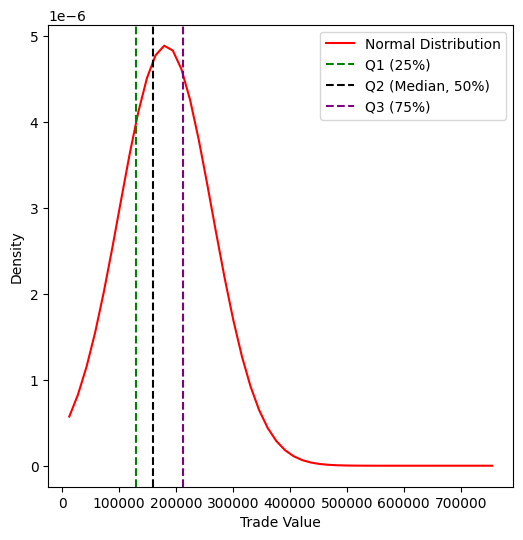

Skewness: 1.8640103657962097 which constitutes an extremely skewed distribution
Trade value is positively skewed with the mode located in the Q3


In [113]:
#Trade Value bell curve distribution

x = TradeValFrame

# Fit normal distribution parameters
mu, sigma = np.mean(x), np.std(x)

# Generate x values for smooth curve
x_range = np.linspace(min(x), max(x))

# Compute normal distribution PDF
y = norm.pdf(x_range, mu, sigma)

# Compute Quartiles
Q1 = np.percentile(x, 25)  # 1st quartile (25th percentile)
Q2 = np.median(x)          # Median (50th percentile)
Q3 = np.percentile(x, 75)  # 3rd quartile (75th percentile)

# Plot the normal distribution
plt.figure(figsize=(6, 6))
plt.plot(x_range, y, color='red', label='Normal Distribution')

# Add quartile lines
plt.axvline(Q1, color='green', linestyle='--', label='Q1 (25%)')
plt.axvline(Q2, color='black', linestyle='--', label='Q2 (Median, 50%)')
plt.axvline(Q3, color='purple', linestyle='--', label='Q3 (75%)')

# Labels and legend
plt.ylabel("Density")
plt.xlabel("Trade Value")
plt.legend()
plt.show()

#Skewness
skewness = TradeValFrame.skew()
print(f"Skewness: {skewness}" + " which constitutes an extremely skewed distribution")
print("Trade value is positively skewed with the mode located in the Q3")


Outliers

- Detect Outliers by highlighing area on a histogram
- Detect Outliers by comparing it to 3 times the stardard devation 
- Detect Outliers by using 1.5 * IQR also put a box graph for this one so it's visual as well 
- After all that decide what to do with the outliers and provide reasons 

Visual Approach

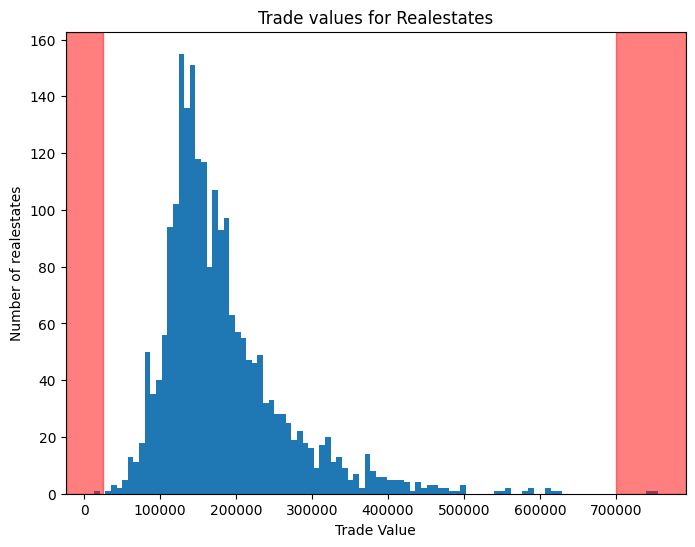

In [114]:
# Show a histogram with a bucket size of 100
plt.hist(df['TradeValue'],100)
plt.title("Trade values for Realestates")
plt.xlabel("Trade Value")
plt.ylabel("Number of realestates")

xmin , xmax =  plt.xlim()
# Hightlight the outliners using spotted values
plt.axvspan(700000, xmax , color='red', alpha=0.5)
plt.axvspan(xmin, 25000 , color='red', alpha=0.5)
# Limit the graph to prevent dynamic correct of x axis
plt.xlim(xmin,xmax)
plt.show()



3 times standard diveation

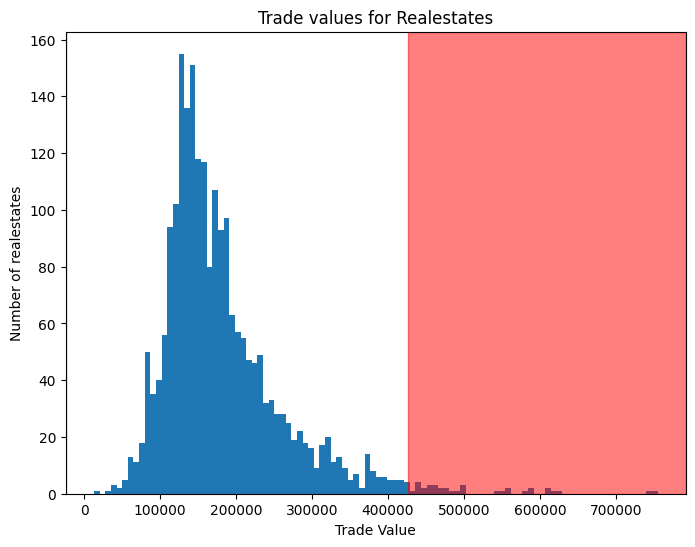

In [115]:
std = df['TradeValue'].std()
mean = df['TradeValue'].mean()

plt.hist(df['TradeValue'],100)
plt.title("Trade values for Realestates")
plt.xlabel("Trade Value")
plt.ylabel("Number of realestates")

xmin , xmax =  plt.xlim()
# Hightlight the outliners using spotted values
plt.axvspan(mean+3*std, xmax , color='red', alpha=0.5)
plt.axvspan(xmin, mean -3*std, color='red', alpha=0.5)
# Limit the graph to prevent dynamic correct of x axis
plt.xlim(xmin,xmax)
plt.show()


1.5 * IQR

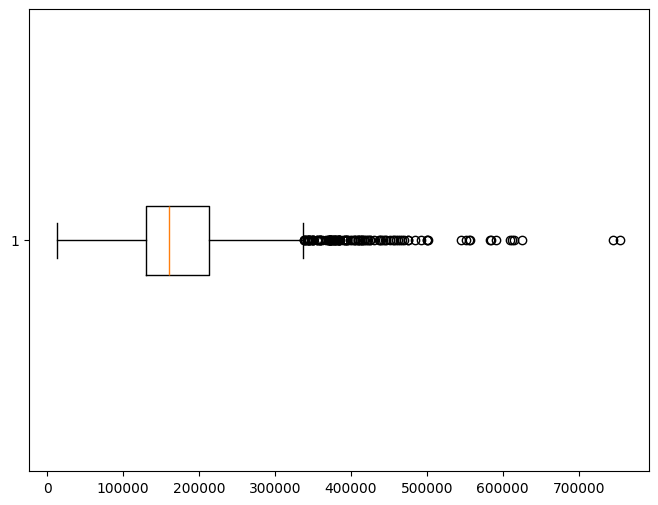

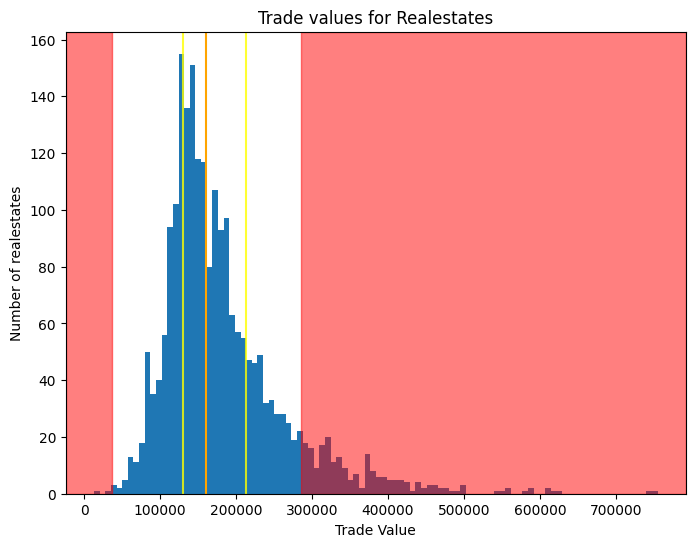

In [116]:

Q1 = df['TradeValue'].quantile(0.25)
Q3 = df['TradeValue'].quantile(0.75)
median = df['TradeValue'].quantile(0.5)
IQR = Q3 - Q1

plt.boxplot(df['TradeValue'],orientation='horizontal')
plt.show()


plt.hist(df['TradeValue'],100)
plt.title("Trade values for Realestates")
plt.xlabel("Trade Value")
plt.ylabel("Number of realestates")

xmin , xmax =  plt.xlim()
# Highlight the median with a line
plt.axvline(median , color='orange', alpha=1)
plt.axvline(Q1, color='yellow', alpha=0.8)
plt.axvline(Q3, color='yellow', alpha=0.8)

# Hightlight the outliners using spotted values
plt.axvspan(median+(IQR*1.5), xmax , color='red', alpha=0.5)
plt.axvspan(xmin, median-(IQR*1.5), color='red', alpha=0.5)
# Limit the graph to prevent dynamic correct of x axis
plt.xlim(xmin,xmax)
plt.show()


Scatter Graphs


- Create scatter graph to see colleration between LivingQuarters (X) and TradeValue (Y)
- Create scatter graph to see colleration between ParcelSize (X) and TradeValue  (Y)
- Describe each graph's trends


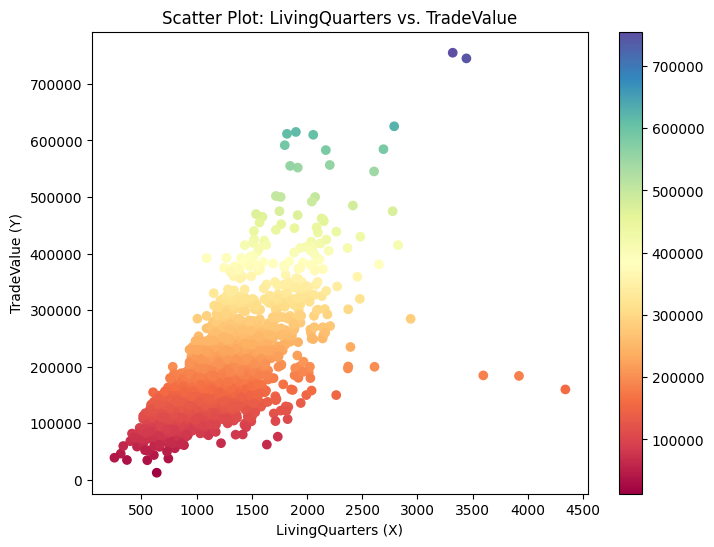

In [117]:
rcParams['figure.figsize'] = 8,6
plt.scatter(df["LivingQuarters"], df["TradeValue"], c=df["TradeValue"], cmap='Spectral')

plt.xlabel("LivingQuarters (X)")
plt.ylabel("TradeValue (Y)")
plt.title("Scatter Plot: LivingQuarters vs. TradeValue")
plt.colorbar()
plt.show()

There is a positive correlation between the number of LivingQuarters and TradeValue. As the number of LivingQuarters increases, the TradeValue tends to increase.

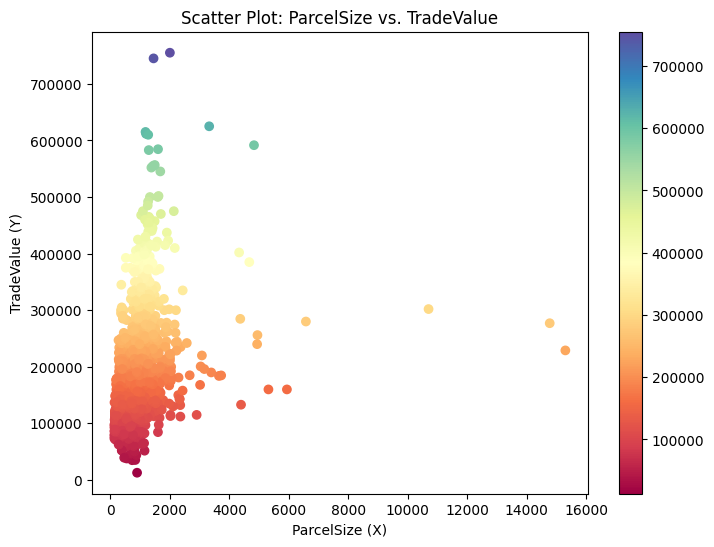

In [118]:
rcParams['figure.figsize'] = 8,6
plt.scatter(df["ParcelSize"], df["TradeValue"], c=df["TradeValue"], cmap='Spectral')

plt.xlabel("ParcelSize (X)")
plt.ylabel("TradeValue (Y)")
plt.title("Scatter Plot: ParcelSize vs. TradeValue")
plt.colorbar()
plt.show()

The relationship between ParcelSize and TradeValue appears less clear compared to LivingQuarters.

## Modeling

Benchmark models

- Split into Train and Testing sets 
- Calculate the mean or median of TradeValue 
- Calculate the MAE metric and MSE based on that  

In [119]:
# Split data into Training (80%) and Testing (20%)
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# Assign the benchmark prediction using median
test_set["BenchmarkPrediction"] = median_trade_value

#Evaluate the model
mae = mean_absolute_error(test_set["TradeValue"], test_set["BenchmarkPrediction"])
mse = mean_squared_error(test_set["TradeValue"], test_set["BenchmarkPrediction"])

#Print Evaluation Metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


Mean Absolute Error (MAE): 52562.45124716553
Mean Squared Error (MSE): 6456727626.306123


Visualizing Training & Testing Split

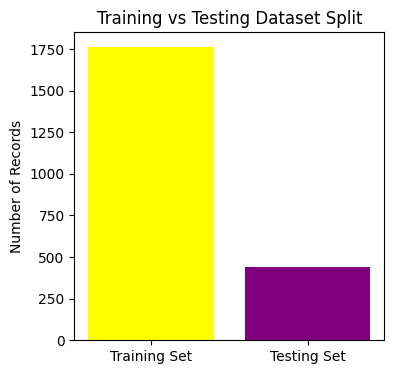

In [120]:
# Define dataset sizes
sizes = [train_set.shape[0], test_set.shape[0]]
labels = ["Training Set", "Testing Set"]

# Plot the dataset split
plt.figure(figsize=(4,4))
plt.bar(labels, sizes, color=['yellow', 'purple'])
plt.ylabel("Number of Records")
plt.title("Training vs Testing Dataset Split")
plt.show()

Visualizing Benchmark Predictions vs Actual Trade Values


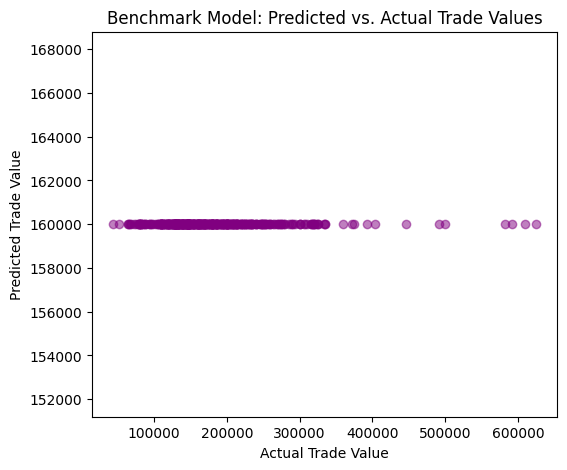

In [121]:


# Scatter plot of actual vs predicted trade values
plt.figure(figsize=(6,5))
plt.scatter(test_set["TradeValue"], test_set["BenchmarkPrediction"], alpha=0.5, color="purple")
plt.xlabel("Actual Trade Value")
plt.ylabel("Predicted Trade Value")
plt.title("Benchmark Model: Predicted vs. Actual Trade Values")
plt.show()



Visualizing Error Distribution (MAE)

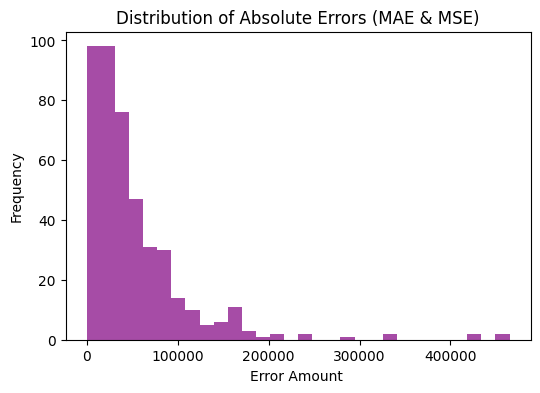

In [122]:
# Calculate absolute errors
errors = abs(test_set["TradeValue"] - test_set["BenchmarkPrediction"])

# Plot histogram
plt.figure(figsize=(6,4))
plt.hist(errors, bins=30, color="purple", alpha=0.7)
plt.xlabel("Error Amount ")
plt.ylabel("Frequency")
plt.title("Distribution of Absolute Errors (MAE & MSE)")
plt.show()


Box Plot for Outlier Detection

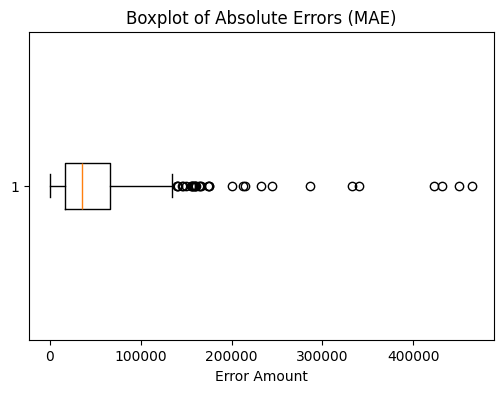

In [123]:
# Box plot of errors
plt.figure(figsize=(6,4))
plt.boxplot(errors, vert=False)
plt.xlabel("Error Amount")
plt.title("Boxplot of Absolute Errors (MAE)")
plt.show()


Visualize Mean vs. Median for Decision


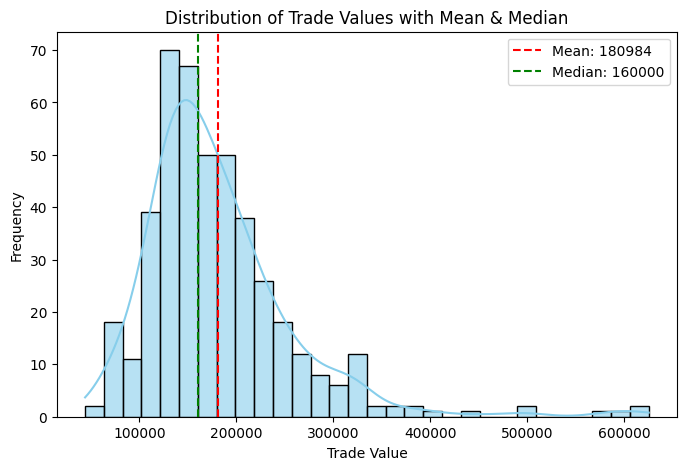

In [124]:
# Plot histogram with mean and median
plt.figure(figsize=(8,5))
sns.histplot(test_set["TradeValue"], bins=30, kde=True, color="skyblue", alpha=0.6)
plt.axvline(mean_trade_value, color="red", linestyle="dashed", label=f"Mean: {int(mean_trade_value)}")
plt.axvline(median_trade_value, color="green", linestyle="dashed", label=f"Median: {int(median_trade_value)}")
plt.legend()
plt.xlabel("Trade Value")
plt.ylabel("Frequency")
plt.title("Distribution of Trade Values with Mean & Median")
plt.show()